In [1]:
pip install prettytable

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.core.display import display, HTML

C:\Users\henry\AppData\Local\Temp\ipykernel_17488\1582991288.py:6: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [3]:
data_path = "C:/Users/henry/Desktop/python/jbook_rna/datos/Single-cell RNASeq data from Mouse Brain"
data_path2 = "C:/Users/henry/Desktop/python/jbook_rna/datos/Theory - Intro to single-cell RNAseq Images"

#### Cargar archivo CSV

In [4]:
brain_counts_file = os.path.join(data_path, "brain_counts.csv")
brain_metadata_file = os.path.join(data_path, "brain_metadata.csv")

In [5]:
df_counts = pd.read_csv(brain_counts_file)
df_metadata = pd.read_csv(brain_metadata_file)

#### Cragar archivos H5AD

In [6]:
glioblastoma_norm_file = os.path.join(data_path, "glioblastoma_normalized.h5ad")
glioblastoma_raw_file = os.path.join(data_path, "glioblastoma_raw.h5ad")
pbmc3k_file = os.path.join(data_path, "pbmc3k.h5ad")

In [7]:
adata_glioblastoma_norm = sc.read_h5ad(glioblastoma_norm_file)
adata_glioblastoma_raw = sc.read_h5ad(glioblastoma_raw_file)
adata_pbmc3k = sc.read_h5ad(pbmc3k_file)

C:\Users\henry\miniconda3\envs\ml_venv\lib\site-packages\anndata\compat\__init__.py:329: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
C:\Users\henry\miniconda3\envs\ml_venv\lib\site-packages\anndata\compat\__init__.py:329: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


## Análisis Exploratorio de los Datos

In [8]:
# Mostrar dimensiones
print(f"🔹 Dimensiones de la matriz de expresión: {df_counts.shape}")  # (células, genes)
print(f"🔹 Dimensiones de la metadata: {df_metadata.shape}")  # (células, variables)

🔹 Dimensiones de la matriz de expresión: (3401, 23434)
🔹 Dimensiones de la metadata: (3401, 6)


In [9]:
print("\n Información general de los datos:")
print(df_counts.info())


 Información general de los datos:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401 entries, 0 to 3400
Columns: 23434 entries, Unnamed: 0 to zsGreen_transgene
dtypes: int64(23433), object(1)
memory usage: 608.1+ MB
None


In [10]:
# Convertir el dataframe en una tabla interactiva
display(HTML(df_counts.iloc[:20, :10].to_html()))

In [11]:
print("\n La sestadísticas descriptivas de la matriz de expresión:")
display(HTML(df_counts.describe().to_html()))


 La sestadísticas descriptivas de la matriz de expresión:


Datos faltantes

In [12]:
missing_values_df_counts = df_counts.isna().sum().sum()
print(f"\n🔹 Valores faltantes en la matriz de expresión: {missing_values_df_counts}")


🔹 Valores faltantes en la matriz de expresión: 0


Distriucion d egenes mas expresados

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genes.index, y=top_genes.values, palette="coolwarm")
plt.xticks(rotation = 45)
plt.title("Top 10 genes más expresados")
plt.ylabel("Número de células")
plt.xlabel("Genes")
plt.ticklabel_format(style='plain', axis = 'y')
plt.show()


NameError: name 'top_genes' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
top_menos_genes = df_counts.sum().sort_values(ascending=True).head(100)
print("\n🔹 Top 10 genes menos expresados:")
print(top_menos_genes)
# display(HTML(top_menos_genes.to_html()))


🔹 Top 10 genes menos expresados:
zsGreen_transgene    0
Olfr1419             0
Olfr1418             0
Olfr1416             0
Olfr1415             0
                    ..
BC048602             0
Olfr1353             0
Olfr1351             0
BC049730             0
Olfr1350             0
Length: 100, dtype: int64


In [ ]:
genes_sin_expresion = df_counts[df_counts.iloc[:,1:].sum(axis=1) == 0]
display(HTML(genes_sin_expresion.head().to_html()))

Añadir conteos por cuartiles top por cuarrtiles

In [146]:
# quartiles = df_counts.sum().quantile([0.25, 0.5, 0.75])
# low = df_counts.loc[:, df_counts.sum() <= quartiles.loc[0.25]]
# mid_low = df_counts.loc[:, (df_counts.sum() > quartiles.loc[0.25]) & (df_counts.sum() <= quartiles.loc[0.5])]
# mid_high = df_counts.loc[:, (df_counts.sum() > quartiles.loc[0.5]) & (df_counts.sum() <= quartiles.loc[0.75])]
# high = df_counts.loc[:, df_counts.sum() > quartiles.loc[0.75]]

proporcion expresion genica


In [ ]:
genes_sin_expresion = (df_counts.iloc[:, 1:].sum()== 0).sum()
genes_con_expresion = (df_counts.iloc[:, 1:].sum() > 0).sum()

C:\Users\henry\AppData\Local\Temp\ipykernel_22152\3186239152.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=sizes, palette='coolwarm', ax=axes[1])


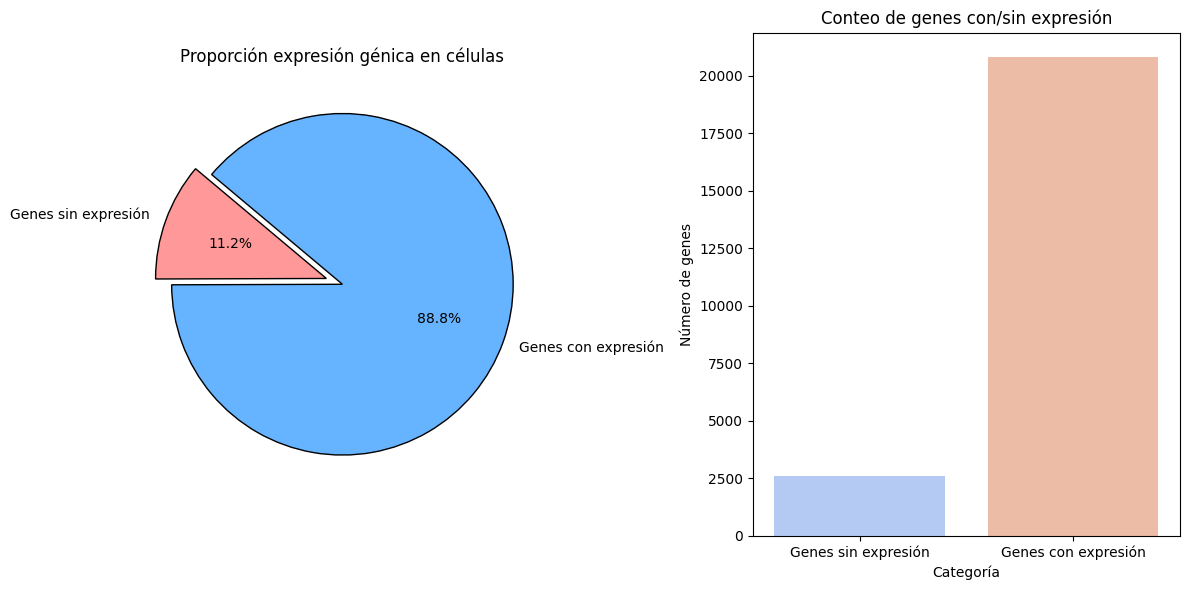

In [ ]:
labels = ['Genes sin expresión', 'Genes con expresión']
sizes = [genes_sin_expresion, genes_con_expresion]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0) 

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=140, wedgeprops={"edgecolor": "black"})
axes[0].set_title("Proporción expresión génica en células")

sns.barplot(x=labels, y=sizes, palette='coolwarm', ax=axes[1])
axes[1].set_ylabel("Número de genes")
axes[1].set_xlabel("Categoría")
axes[1].set_title("Conteo de genes con/sin expresión")

plt.tight_layout()
plt.show()

In [ ]:
from prettytable import PrettyTable

# Seleccionar una muestra de filas y columnas para mostrar
sample_df = df_counts.iloc[:5, :500]  # 5 filas y 5 columnas

table = PrettyTable()
table.field_names = ["Célula"] + list(sample_df.columns)

for index, row in sample_df.iterrows():
    table.add_row([index] + list(row))

print(table)


+--------+-------------------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+-----------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+---------------+--------

conteo de genes por celula

In [ ]:
cell_gene_counts = (df_counts.iloc[:, 1:]>0).sum(axis=1)
top10_cells = cell_gene_counts.sort_values(ascending=False).head(10)

top10_cells_df = top10_cells.reset_index()
top10_cells_df.columns = ["Célula", "Genes expresados"]
display(HTML(top10_cells_df.to_html(index=False)))

C:\Users\henry\AppData\Local\Temp\ipykernel_22152\3774177792.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_cells.index, y=top10_cells, palette="coolwarm")


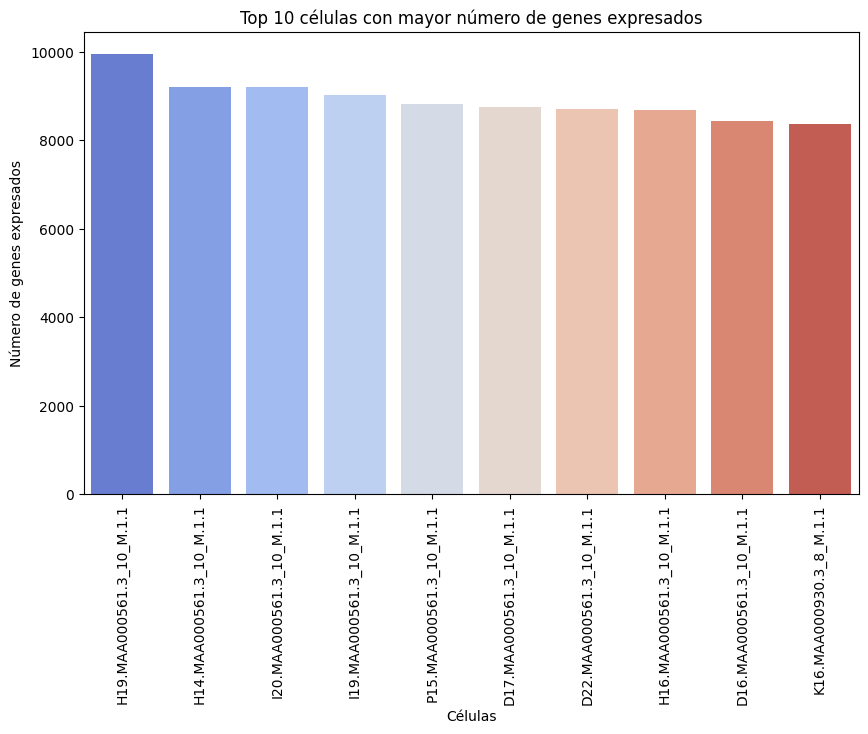

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top10_cells.index, y=top10_cells, palette="coolwarm")
plt.xticks(rotation = 90)
plt.xlabel("Células")
plt.ylabel("Número de genes expresados")
plt.title("Top 10 células con mayor número de genes expresados")
plt.show()

hacer por cuartil

distribucion de expresion genica top 10 celulas

### Metadata

In [ ]:
print("Dimensión del DataFrame:", df_metadata.shape)


Dimensión del DataFrame: (3401, 6)


In [ ]:
print("📊 Información del DataFrame:")
df_metadata.info()

📊 Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401 entries, 0 to 3400
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   cell                 3401 non-null   object
 1   cell_ontology_class  3401 non-null   object
 2   subtissue            3401 non-null   object
 3   mouse.sex            3401 non-null   object
 4   mouse.id             3401 non-null   object
 5   plate.barcode        3401 non-null   object
dtypes: object(6)
memory usage: 159.5+ KB


In [ ]:
print("\n📈 Descripción de las variables numéricas:")
display(HTML(df_metadata.describe().to_html()))


📈 Descripción de las variables numéricas:


In [ ]:
print("\n🔹 Primeras 10 filas del DataFrame:")
display(HTML(df_metadata.head(10).to_html(index=False)))


🔹 Primeras 10 filas del DataFrame:


conteo de tipo de células

C:\Users\henry\AppData\Local\Temp\ipykernel_22152\4005747970.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cell_type_counts.index, y=cell_type_counts.values, palette="coolwarm", ax=axes[0])
C:\Users\henry\AppData\Local\Temp\ipykernel_22152\4005747970.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cell_type_percent.index, y=cell_type_percent.values, palette="coolwarm", ax=axes[1])


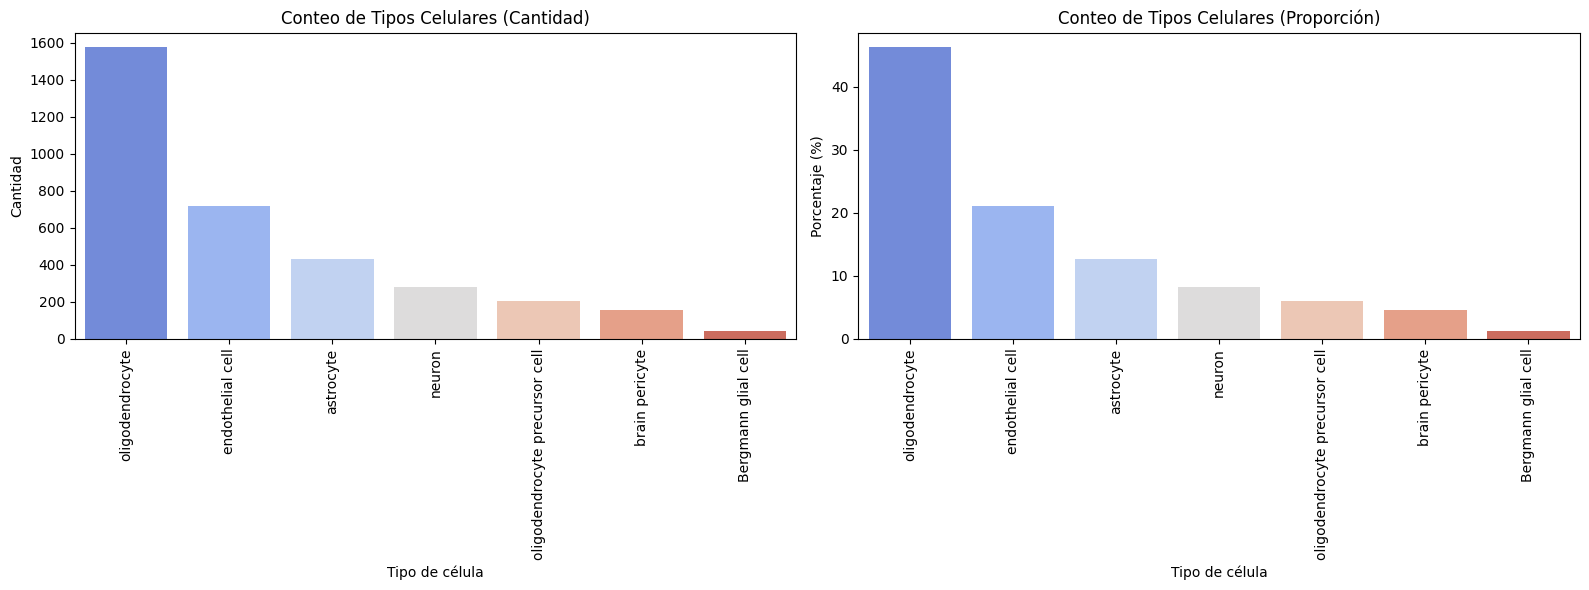

In [ ]:
cell_type_counts = df_metadata["cell_ontology_class"].value_counts()
cell_type_percent = (cell_type_counts / cell_type_counts.sum()) * 100

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(x=cell_type_counts.index, y=cell_type_counts.values, palette="coolwarm", ax=axes[0])
axes[0].set_title("Conteo de Tipos Celulares (Cantidad)")
axes[0].set_xlabel("Tipo de célula")
axes[0].set_ylabel("Cantidad")
axes[0].tick_params(axis='x', rotation=90)

sns.barplot(x=cell_type_percent.index, y=cell_type_percent.values, palette="coolwarm", ax=axes[1])
axes[1].set_title("Conteo de Tipos Celulares (Proporción)")
axes[1].set_xlabel("Tipo de célula")
axes[1].set_ylabel("Porcentaje (%)")
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


conteo y proporcion por tejido

C:\Users\henry\AppData\Local\Temp\ipykernel_22152\423397699.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subtissue_type_counts.index, y=subtissue_type_counts.values, palette="coolwarm", ax=axes[0])


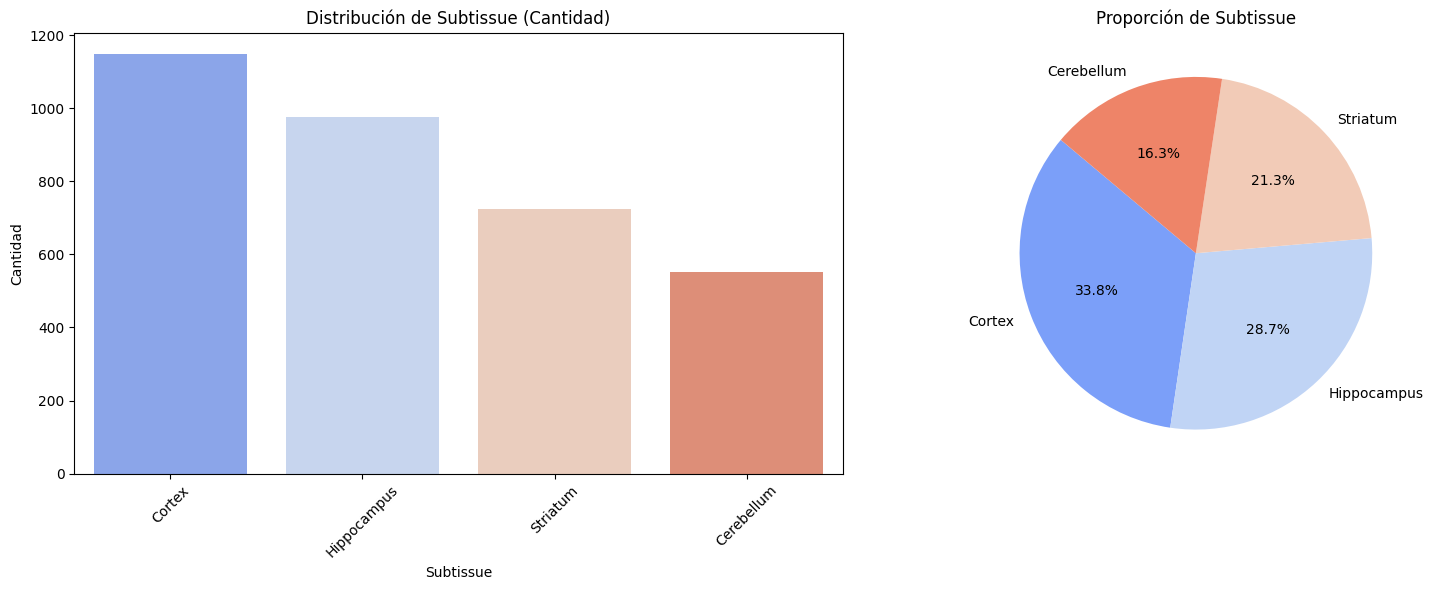

In [ ]:
subtissue_type_counts = df_metadata['subtissue'].value_counts()
subtissue_type_percent = (subtissue_type_counts / subtissue_type_counts.sum()) * 100

fig, axes = plt.subplots(1, 2, figsize=(16, 6))


# 📊 Gráfico de barras - Conteo de subtissue
sns.barplot(x=subtissue_type_counts.index, y=subtissue_type_counts.values, palette="coolwarm", ax=axes[0])
axes[0].set_title("Distribución de Subtissue (Cantidad)")
axes[0].set_xlabel("Subtissue")
axes[0].set_ylabel("Cantidad")
axes[0].tick_params(axis='x', rotation=45)

# 🥧 Gráfico de pastel - Proporción de subtissue
colors = sns.color_palette("coolwarm", len(subtissue_type_counts))  # Colores
axes[1].pie(subtissue_type_percent, labels=subtissue_type_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
axes[1].set_title("Proporción de Subtissue")

# 📈 Ajustar diseño y mostrar
plt.tight_layout()
plt.show()


In [ ]:
# Información de las columnas
print("\n📝 Información de la Metadata:")
print(df_metadata.info())



📝 Información de la Metadata:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401 entries, 0 to 3400
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   cell                 3401 non-null   object
 1   cell_ontology_class  3401 non-null   object
 2   subtissue            3401 non-null   object
 3   mouse.sex            3401 non-null   object
 4   mouse.id             3401 non-null   object
 5   plate.barcode        3401 non-null   object
dtypes: object(6)
memory usage: 159.5+ KB
None


datos faltantes

In [ ]:
# Revisar valores nulos
print("\n🔍 Valores nulos en Metadata:")
print(df_metadata.isnull().sum())


🔍 Valores nulos en Metadata:
cell                   0
cell_ontology_class    0
subtissue              0
mouse.sex              0
mouse.id               0
plate.barcode          0
dtype: int64


In [165]:
# Ver primeras filas
print("\n🧬 Matriz de Expresión Génica (primeras filas):")
display(HTML(df_metadata.head(10).to_html()))


🧬 Matriz de Expresión Génica (primeras filas):


In [150]:
# Resumen estadístico
print("\n📈 Resumen Estadístico:")
display(HTML(df_metadata.describe().to_html()))
# print(df_counts.describe())


📈 Resumen Estadístico:


In [ ]:
# Revisar valores nulos
print("\n🔍 Valores nulos en la Matriz de Expresión:")
print(df_counts.isnull().sum().sum())


🔍 Valores nulos en la Matriz de Expresión:
0


Análiis por sexo

In [ ]:
df_metadata_m = df_metadata[C == 'M']
df_metadata_f = df_metadata[df_metadata['mouse.sex'] == 'F']

print('\n Filtramos por sexo de ratón y tenemos que: ')
print(f"🐭 Machos: {df_metadata_m.shape[0]}")
print(f"🐭 Hembras: {df_metadata_f.shape[0]}")


 Filtramos por sexo de ratón y tenemos que: 
🐭 Machos: 2694
🐭 Hembras: 707


C:\Users\henry\AppData\Local\Temp\ipykernel_22152\3189286318.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sex_counts.index, y=sex_counts.values, palette="pastel", ax=axes[0])


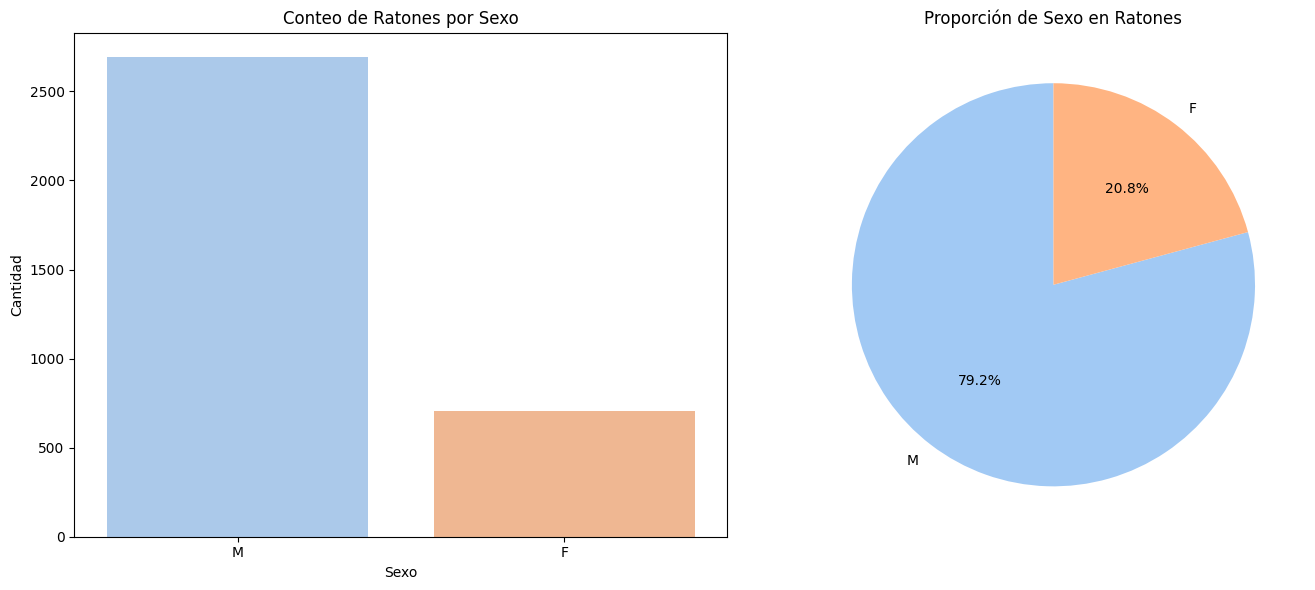

In [152]:
sex_counts = df_metadata['mouse.sex'].value_counts()

# Crear la figura con dos subgráficos
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de barras
sns.barplot(x=sex_counts.index, y=sex_counts.values, palette="pastel", ax=axes[0])
axes[0].set_title("Conteo de Ratones por Sexo")
axes[0].set_xlabel("Sexo")
axes[0].set_ylabel("Cantidad")

# Gráfico de pastel
axes[1].pie(sex_counts.values, labels=sex_counts.index, autopct='%1.1f%%', 
            colors=sns.color_palette("pastel", len(sex_counts)), startangle=90)
axes[1].set_title("Proporción de Sexo en Ratones")

# Ajustar diseño y mostrar
plt.tight_layout()
plt.show()

C:\Users\henry\AppData\Local\Temp\ipykernel_22152\293180145.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tissue_counts_m.index, y=tissue_counts_m.values, palette="coolwarm", ax=axes[0, 0])
C:\Users\henry\AppData\Local\Temp\ipykernel_22152\293180145.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tissue_counts_f.index, y=tissue_counts_f.values, palette="coolwarm", ax=axes[0, 1])


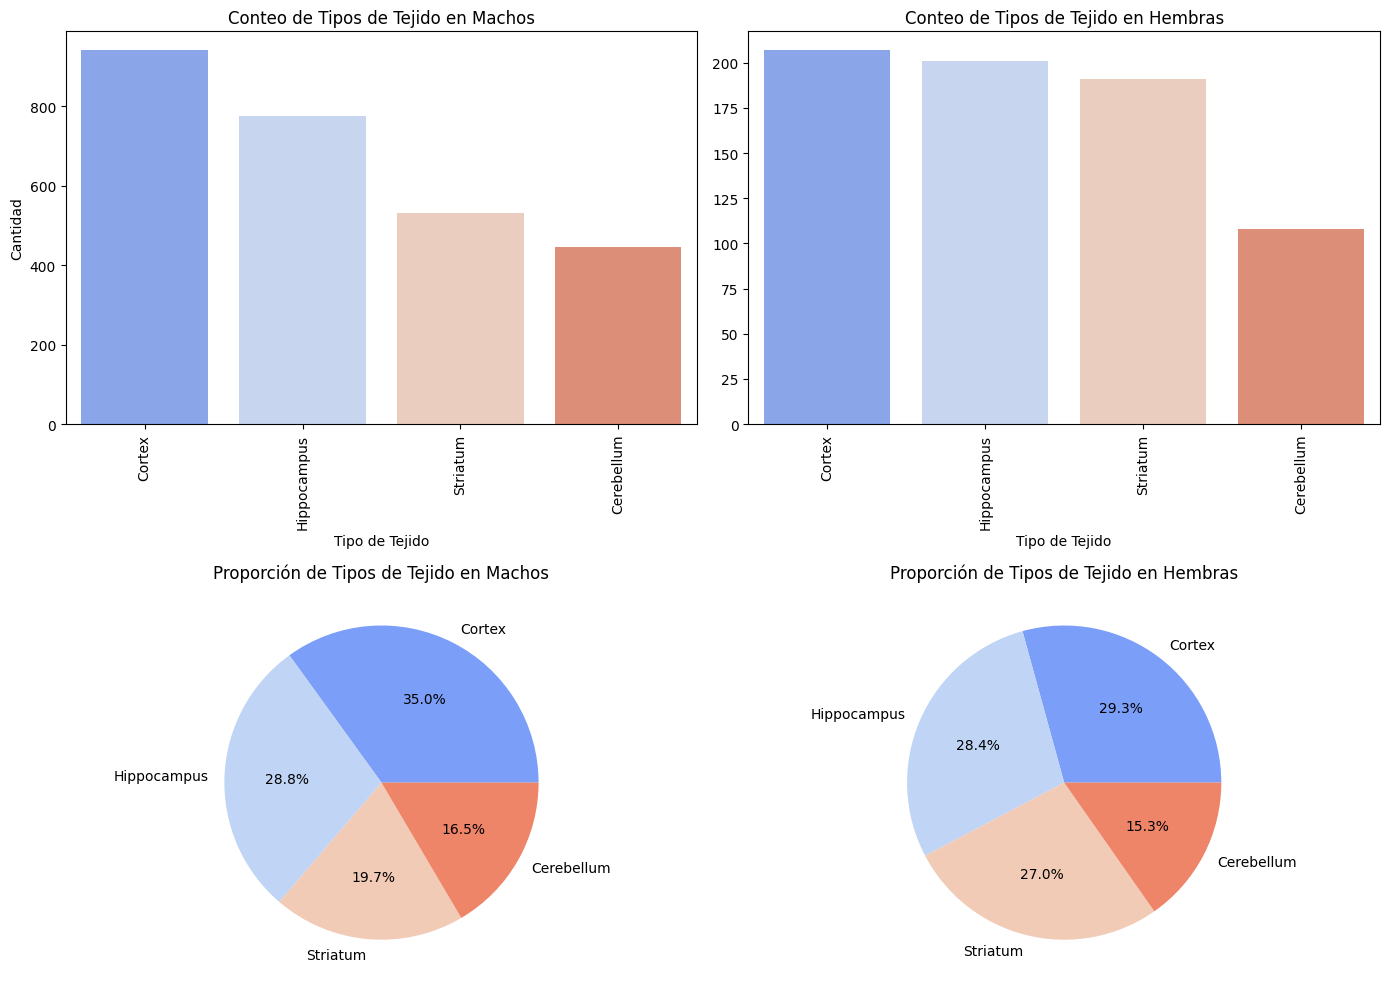

In [ ]:
tissue_counts_m = df_metadata[df_metadata['mouse.sex'] == 'M']['subtissue'].value_counts()
tissue_counts_f = df_metadata[df_metadata['mouse.sex'] == 'F']['subtissue'].value_counts()

# Crear la figura con cuatro subgráficos (2x2)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Gráfico de barras para machos
sns.barplot(x=tissue_counts_m.index, y=tissue_counts_m.values, palette="coolwarm", ax=axes[0, 0])
axes[0, 0].set_title("Conteo de Tipos de Tejido en Machos")
axes[0, 0].set_xlabel("Tipo de Tejido")
axes[0, 0].set_ylabel("Cantidad")
axes[0, 0].tick_params(axis='x', rotation=90)

# Gráfico de barras para hembras
sns.barplot(x=tissue_counts_f.index, y=tissue_counts_f.values, palette="coolwarm", ax=axes[0, 1])
axes[0, 1].set_title("Conteo de Tipos de Tejido en Hembras")
axes[0, 1].set_xlabel("Tipo de Tejido")
axes[0, 1].tick_params(axis='x', rotation=90)

# Gráfico de pastel para machos
axes[1, 0].pie(tissue_counts_m.values, labels=tissue_counts_m.index, autopct='%1.1f%%', 
               colors=sns.color_palette("coolwarm", len(tissue_counts_m)))
axes[1, 0].set_title("Proporción de Tipos de Tejido en Machos")

# Gráfico de pastel para hembras
axes[1, 1].pie(tissue_counts_f.values, labels=tissue_counts_f.index, autopct='%1.1f%%', 
               colors=sns.color_palette("coolwarm", len(tissue_counts_f)))
axes[1, 1].set_title("Proporción de Tipos de Tejido en Hembras")

plt.tight_layout()
plt.show()

celular por sexo

C:\Users\henry\AppData\Local\Temp\ipykernel_22152\527172210.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cell_counts.index, y=cell_counts.values, palette="coolwarm", ax=axes[0])


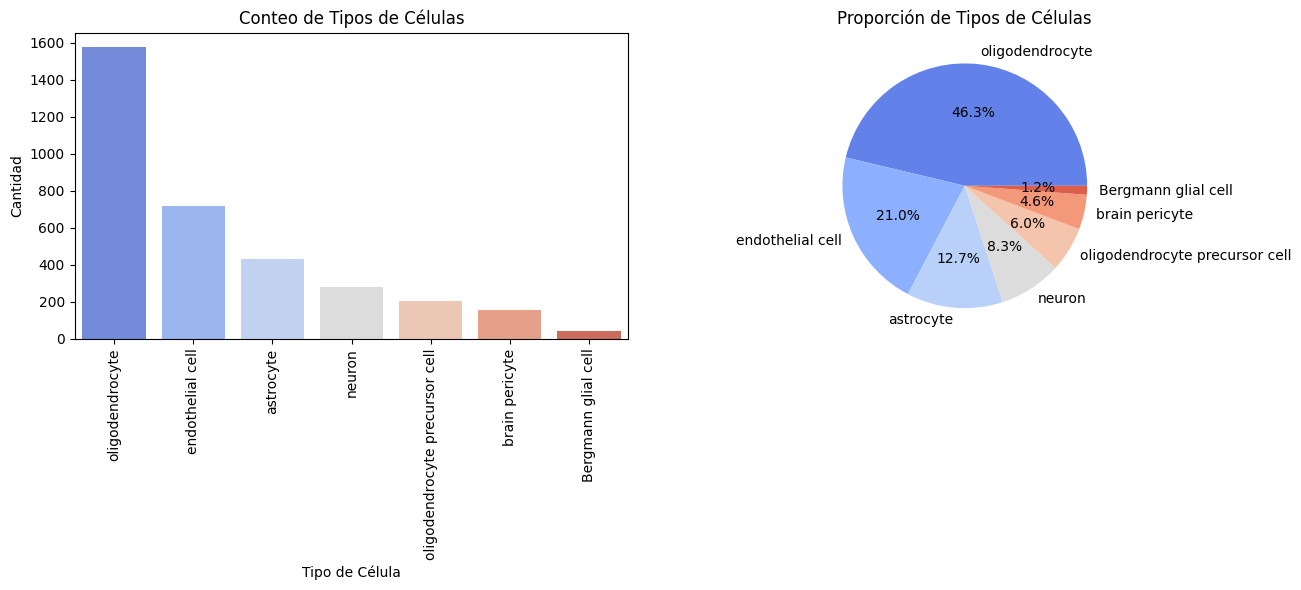

In [159]:
cell_counts = df_metadata['cell_ontology_class'].value_counts()

# Crear la figura con dos subgráficos (1x2)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de barras
sns.barplot(x=cell_counts.index, y=cell_counts.values, palette="coolwarm", ax=axes[0])
axes[0].set_title("Conteo de Tipos de Células")
axes[0].set_xlabel("Tipo de Célula")
axes[0].set_ylabel("Cantidad")
axes[0].tick_params(axis='x', rotation=90)

# Gráfico de pastel
axes[1].pie(cell_counts.values, labels=cell_counts.index, autopct='%1.1f%%', 
            colors=sns.color_palette("coolwarm", len(cell_counts)))
axes[1].set_title("Proporción de Tipos de Células")

plt.tight_layout()
plt.show()

C:\Users\henry\AppData\Local\Temp\ipykernel_22152\571404742.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cell_counts.index, y=cell_counts.values, palette="coolwarm", ax=axes[0])
C:\Users\henry\AppData\Local\Temp\ipykernel_22152\571404742.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cell_proportions.index, y=cell_proportions.values, palette="coolwarm", ax=axes[1])


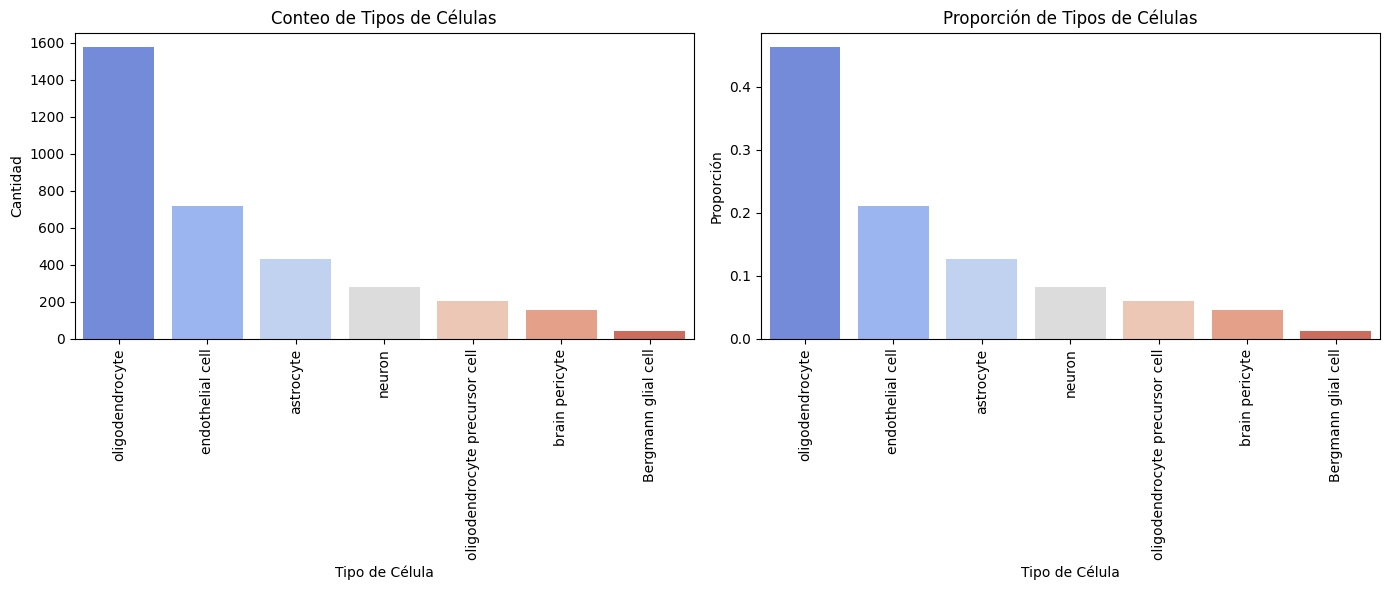

In [161]:
# Contar la cantidad de cada tipo de célula
cell_counts = df_metadata['cell_ontology_class'].value_counts()

# Calcular las proporciones
cell_proportions = cell_counts / cell_counts.sum()

# Crear la figura con dos subgráficos (1x2)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de barras para conteo
sns.barplot(x=cell_counts.index, y=cell_counts.values, palette="coolwarm", ax=axes[0])
axes[0].set_title("Conteo de Tipos de Células")
axes[0].set_xlabel("Tipo de Célula")
axes[0].set_ylabel("Cantidad")
axes[0].tick_params(axis='x', rotation=90)

# Gráfico de barras para proporciones
sns.barplot(x=cell_proportions.index, y=cell_proportions.values, palette="coolwarm", ax=axes[1])
axes[1].set_title("Proporción de Tipos de Células")
axes[1].set_xlabel("Tipo de Célula")
axes[1].set_ylabel("Proporción")
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

grafuca por tipo de celula por tejido

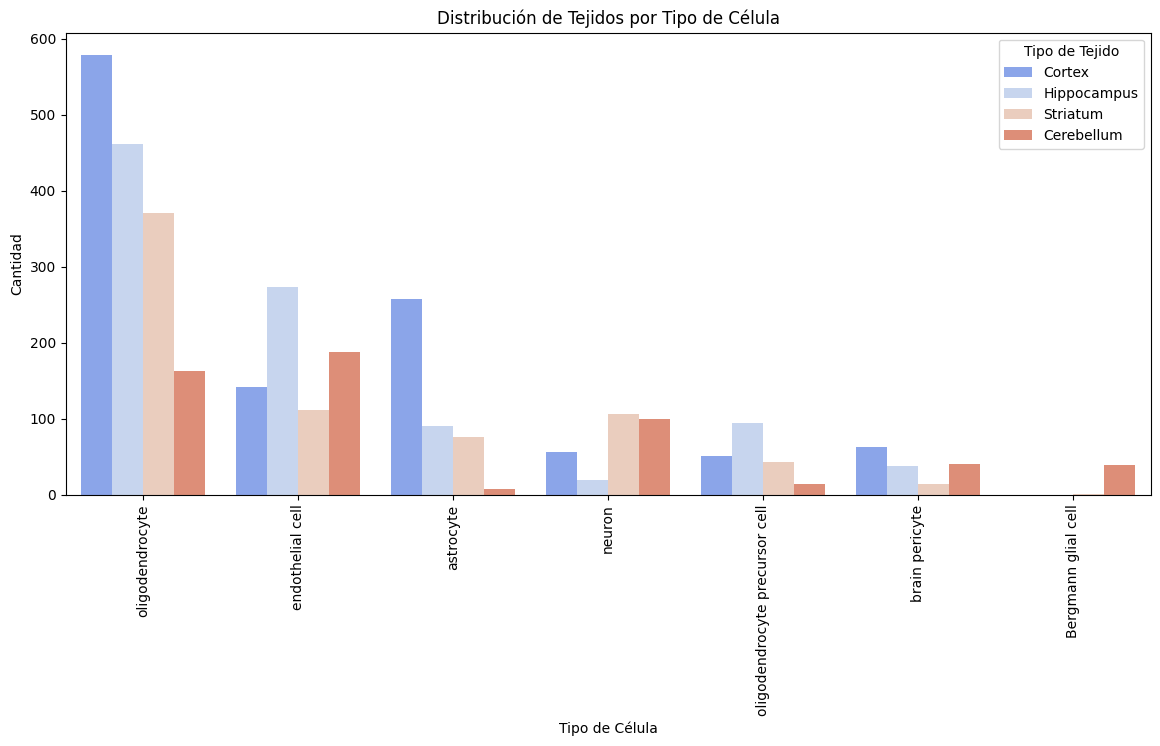

In [163]:
# Contar la cantidad de cada tipo de tejido por tipo de célula
tissue_by_cell = df_metadata.groupby(['cell_ontology_class', 'subtissue']).size().reset_index(name='count')

# Ordenar por cantidad de mayor a menor
tissue_by_cell = tissue_by_cell.sort_values(by='count', ascending=False)

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(14, 6))
sns.barplot(
    data=tissue_by_cell, 
    x='cell_ontology_class', 
    y='count', 
    hue='subtissue', 
    palette='coolwarm', 
    order=tissue_by_cell.groupby('cell_ontology_class')['count'].sum().sort_values(ascending=False).index
)

# Personalizar etiquetas
plt.title("Distribución de Tejidos por Tipo de Célula")
plt.xlabel("Tipo de Célula")
plt.ylabel("Cantidad")
plt.xticks(rotation=90)
plt.legend(title="Tipo de Tejido")

plt.show()

diferencias significativas entre el conteo de células por cada sexo

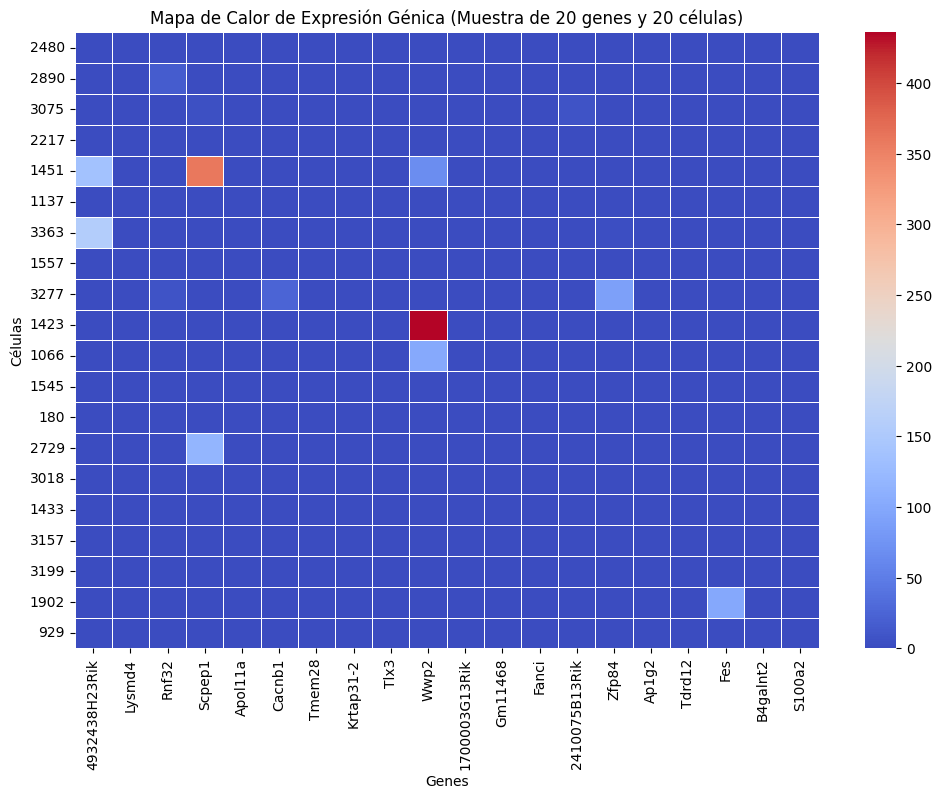

In [ ]:
# Seleccionar una muestra aleatoria de 20 genes y 20 células
sample_genes = df_counts.sample(n=20, axis=1)  # Elegimos 20 genes aleatoriamente
sample_cells = sample_genes.sample(n=20, axis=0)  # Tomamos 20 células aleatorias

# Mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(sample_cells, cmap="coolwarm", linewidths=0.5)
plt.title("Mapa de Calor de Expresión Génica (Muestra de 20 genes y 20 células)")
plt.xlabel("Genes")
plt.ylabel("Células")
plt.show()

In [ ]:
print(df_counts.columns[:5])  # Muestra los primeros nombres de columnas en df_counts
print(df_metadata["cell"].head())  # Muestra las primeras células en df_metadata


Index(['Unnamed: 0', '0610005C13Rik', '0610007C21Rik', '0610007L01Rik',
       '0610007N19Rik'],
      dtype='object')
0      A1.B003290.3_38_F.1.1
1      A1.B003728.3_56_F.1.1
2    A1.MAA000560.3_10_M.1.1
3    A1.MAA000564.3_10_M.1.1
4     A1.MAA000923.3_9_M.1.1
Name: cell, dtype: object


In [ ]:
print(df_counts.shape)
print(df_counts.index[:5])  # Muestra los primeros nombres de filas


(3401, 23434)
RangeIndex(start=0, stop=5, step=1)


In [ ]:
if df_counts.index.equals(df_metadata["cell"]):
    df_counts = df_counts.T  # Transponer si las células están en las filas


In [ ]:
astro_cells = df_metadata[df_metadata["cell_ontology_class"] == "astrocyte"]["cell"]
oligo_cells = df_metadata[df_metadata["cell_ontology_class"] == "oligodendrocyte"]["cell"]

astro_cells = astro_cells[astro_cells.isin(df_counts.columns)]  # Filtrar solo las existentes
oligo_cells = oligo_cells[oligo_cells.isin(df_counts.columns)]

df_astro = df_counts[astro_cells]
df_oligo = df_counts[oligo_cells]


In [ ]:
# Asegurar que la primera columna sea el índice de las células
df_counts.set_index("Unnamed: 0", inplace=True)

# Verificar nuevamente si el índice coincide con los identificadores de células
print(df_counts.index[:5])
print(df_metadata["cell"].head())


Index(['A1.B003290.3_38_F.1.1', 'A1.B003728.3_56_F.1.1',
       'A1.MAA000560.3_10_M.1.1', 'A1.MAA000564.3_10_M.1.1',
       'A1.MAA000923.3_9_M.1.1'],
      dtype='object', name='Unnamed: 0')
0      A1.B003290.3_38_F.1.1
1      A1.B003728.3_56_F.1.1
2    A1.MAA000560.3_10_M.1.1
3    A1.MAA000564.3_10_M.1.1
4     A1.MAA000923.3_9_M.1.1
Name: cell, dtype: object


In [ ]:
astro_cells = df_metadata[df_metadata["cell_ontology_class"] == "astrocyte"]["cell"]
oligo_cells = df_metadata[df_metadata["cell_ontology_class"] == "oligodendrocyte"]["cell"]

# Filtrar solo células que existen en df_counts.index
astro_cells = astro_cells[astro_cells.isin(df_counts.index)]
oligo_cells = oligo_cells[oligo_cells.isin(df_counts.index)]

df_astro = df_counts.loc[astro_cells]
df_oligo = df_counts.loc[oligo_cells]


## H5AD

In [169]:
print("\nGlioblastoma Raw H5AD:")
print(adata_glioblastoma_raw)


Glioblastoma Raw H5AD:
AnnData object with n_obs × n_vars = 1853 × 7683
    obs: 'disease_state', 'plate_id', 'tissue', 'patient_id', 'cell_type', 'neoplastic_state', 'diagnosis'


In [ ]:
print(adata_glioblastoma_raw)  # Información general
print(adata_glioblastoma_raw.shape)  # Número de células y genes
print(adata.obs.head())  # Metadatos de células
print(adata.var_names[:10])  # Primeros 10 genes


In [ ]:
adata_glioblastoma_raw.obs.head()

disease_state              plate_id         tissue  \
index                                                                      
GSM2243439  diagnosis: glioblastoma  plate id: 1001000173  tissue: Tumor   
GSM2243444  diagnosis: glioblastoma  plate id: 1001000173  tissue: Tumor   
GSM2243445  diagnosis: glioblastoma  plate id: 1001000173  tissue: Tumor   
GSM2243447  diagnosis: glioblastoma  plate id: 1001000173  tissue: Tumor   
GSM2243452  diagnosis: glioblastoma  plate id: 1001000173  tissue: Tumor   

                   patient_id              cell_type        neoplastic_state  \
index                                                                          
GSM2243439  patient id: BT_S2  cell type: Neoplastic  neoplastic: Neoplastic   
GSM2243444  patient id: BT_S2  cell type: Neoplastic  neoplastic: Neoplastic   
GSM2243445  patient id: BT_S2  cell type: Neoplastic  neoplastic: Neoplastic   
GSM2243447  patient id: BT_S2  cell type: Neoplastic  neoplastic: Neoplastic   
GSM2243452  patient id: BT_S2  cell type: Neoplastic  neoplastic: Neoplastic   

             diagnosis  
index                   
GSM2243439  Neoplastic  
GSM2243444  Neoplastic  
GSM2243445  Neoplastic  
GSM2243447  Neoplastic  
GSM2243452  Neoplastic

In [ ]:
adata_glioblastoma_raw.var.head()

Empty DataFrame
Columns: []
Index: [ENSG00000000005, ENSG00000001561, ENSG00000001629, ENSG00000002587, ENSG00000002933]

In [ ]:
adata_glioblastoma_raw.X[:5, :5]  # Muestra una pequeña parte de la matriz


array([[ 0.      ,  0.      ,  0.      ,  3.10702 ,  0.      ],
       [ 0.      ,  0.      ,  0.      ,  4.522569,  0.      ],
       [ 0.      ,  0.      , 55.      ,  1.      ,  0.      ],
       [ 0.      ,  0.      ,  0.      ,  0.      ,  0.      ],
       [ 0.      , 67.      ,  6.      ,  0.      ,  0.      ]],
      dtype=float32)

In [171]:
print(adata_glioblastoma_raw.var_names[:10])  # Muestra los primeros 10 genes

Index(['ENSG00000000005', 'ENSG00000001561', 'ENSG00000001629',
       'ENSG00000002587', 'ENSG00000002933', 'ENSG00000003056',
       'ENSG00000003137', 'ENSG00000004478', 'ENSG00000004779',
       'ENSG00000004799'],
      dtype='object', name='index')


In [8]:
print(adata_glioblastoma_raw.obs.describe())  # Estadísticas de los metadatos de células
print(adata_glioblastoma_raw.var.describe())

                  disease_state              plate_id         tissue  \
count                      1853                  1853           1853   
unique                        1                    64              2   
top     diagnosis: glioblastoma  plate id: 1001000179  tissue: Tumor   
freq                       1853                    80           1170   

               patient_id               cell_type     neoplastic_state  \
count                1853                    1853                 1853   
unique                  4                       7                    2   
top     patient id: BT_S4  cell type: Immune cell  neoplastic: Regular   
freq                  834                     911                 1301   

          diagnosis  
count          1853  
unique            7  
top     Immune cell  
freq            911  


ValueError: Cannot describe a DataFrame without columns

In [ ]:
adata_glioblastoma_raw.obs["cell_type"]


index
GSM2243439    cell type: Neoplastic
GSM2243444    cell type: Neoplastic
GSM2243445    cell type: Neoplastic
GSM2243447    cell type: Neoplastic
GSM2243452    cell type: Neoplastic
                      ...          
GSM2247067      cell type: Vascular
GSM2247068      cell type: Vascular
GSM2247069      cell type: Vascular
GSM2247070    cell type: Neoplastic
GSM2247071    cell type: Neoplastic
Name: cell_type, Length: 1853, dtype: category
Categories (7, object): ['cell type: Astocyte', 'cell type: Immune cell', 'cell type: Neoplastic', 'cell type: Neuron', 'cell type: OPC', 'cell type: Oligodendrocyte', 'cell type: Vascular']

In [ ]:
adata_glioblastoma_raw.obs["cell_type"].value_counts()


cell_type
cell type: Immune cell        911
cell type: Neoplastic         552
cell type: OPC                238
cell type: Astocyte            68
cell type: Oligodendrocyte     48
cell type: Vascular            24
cell type: Neuron              12
Name: count, dtype: int64

#### Test data

test_data = 